In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from time import time
from datetime import datetime

In [79]:
#Reading the interview file

raw_data = pd.read_excel("Interview_Q&A_format.xlsx", skiprows = 1)
raw_data.head()

,Unnamed: 0,Original Transcription,Q&A,Details,Key ideas indicated,Theme
0,1.0,so we have a list of questions here so I'll ju...,Q,Can you clarify your role at IAA and the kind ...,NaN,NaN
1,NaN,NaN,A,"I am the instructor, or as I believe my techni...",NaN,NaN
2,2.0,Maybe I'm Wrong that are you delivering the cl...,Q,Are you responsible for delivering classroom i...,NaN,NaN
3,NaN,NaN,A,"Yes, that's correct. The model we've establish...",NaN,NaN
4,3.0,so you're actually the first instructor we've ...,Q,Are there any opportunities for shadowing beyo...,NaN,NaN


In [80]:
work_df = raw_data[["Q&A", "Details"]].copy()
work_df_ans = work_df[work_df["Q&A"] == "A"].copy()
work_df_ans.head()

,Q&A,Details
1,A,"I am the instructor, or as I believe my techni..."
3,A,"Yes, that's correct. The model we've establish..."
5,A,"Yes, that's right. The Apprentice program itse..."
7,A,"Yes, I do provide some clinical skills instruc..."
9,A,"Yes, I have worked with both Colorado Springs ..."


In [81]:
# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def identify_imp_words(interview_source, input_text, top_number, n_gram):
    # Create a DataFrame with the input text
    df = pd.DataFrame({'text': [input_text]})
    
    # Get the English stop words from NLTK
    stop_words = set(stopwords.words('english'))

    # Custom list of additional stopwords to remove
    custom_stopwords = {'sample', 'input', 'analysis', 'yes', "no", "within", "would",
                       "apprentices","program"}  # Add your own stopwords here

    # Combine NLTK stopwords with custom stopwords
    all_stopwords = stop_words.union(custom_stopwords)
    
    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words=all_stopwords, ngram_range=(n_gram, n_gram))
    
    # Apply the remove_numbers function to remove numbers from text
    df['text'] = df['text'].apply(remove_numbers)
    
    # Fit and transform the text data using TF-IDF
    tfidf_matrix = tfidf_vectorizer.fit_transform(df["text"])

    # Get the feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Create a DataFrame with TF-IDF scores for each word
    tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

    # Sort words by their TF-IDF scores
    important_phrases = tfidf_df.sum().sort_values(ascending=False)
    
    # Print the most important words
    #print(important_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(important_phrases)
    
    timestamp = time()
    date_string = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    
    # Save the Word Cloud as an image
    important_phrases[0:top_number].to_csv(interview_source+"_"+str(n_gram)+"_gram_top_"+str(top_number)+"_"+date_string+".csv")
    wordcloud.to_file(interview_source+"_"+str(n_gram)+"_gram_word_cloud_"+date_string+".png")
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Important phrases")
    plt.show()
    
    # Create a bar chart for the top n important phrases
    top_phrases = important_phrases.head(10)
    plt.subplot(1, 2, 2)
    plt.barh(top_phrases.index, top_phrases.values)
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Phrases")
    plt.title("Top 10 Important Words / Phrases")
    # Save the bar chart as an image
    plt.savefig(interview_source+"_"+str(n_gram)+"_gram_bar_chart_"+date_string+".png")

    plt.tight_layout()
    plt.show()

    return important_phrases[0:top_number]

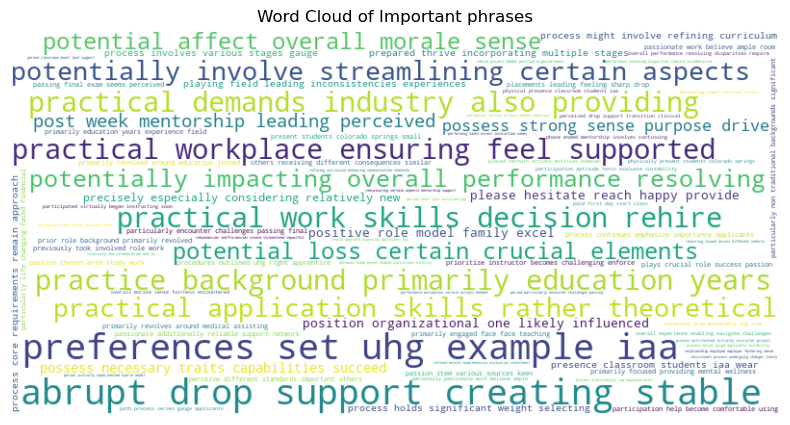

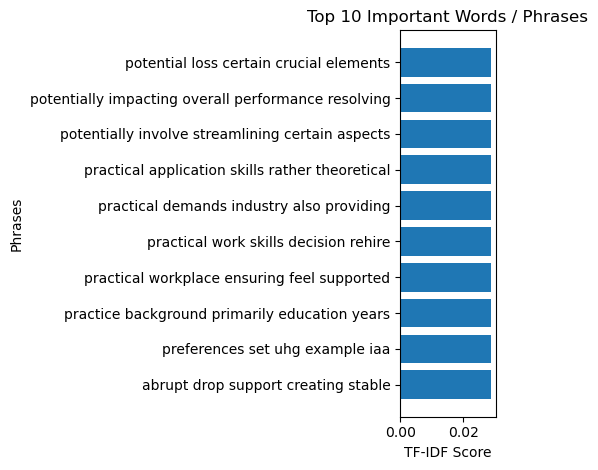

abrupt drop support creating stable                    0.028784
preferences set uhg example iaa                        0.028784
practice background primarily education years          0.028784
practical workplace ensuring feel supported            0.028784
practical work skills decision rehire                  0.028784
practical demands industry also providing              0.028784
practical application skills rather theoretical        0.028784
potentially involve streamlining certain aspects       0.028784
potentially impacting overall performance resolving    0.028784
potential loss certain crucial elements                0.028784
potential affect overall morale sense                  0.028784
post week mentorship leading perceived                 0.028784
possess strong sense purpose drive                     0.028784
possess necessary traits capabilities succeed          0.028784
positive role model family excel                       0.028784
position organizational one likely influ

In [86]:
#work_df_ans["word_freq_list"] = work_df_ans.apply(identify_imp_words, axis = 1)
text_to_analyze = " ".join(work_df_ans["Details"])
print(identify_imp_words("sample",text_to_analyze,20,5))